# 1. MultiClass Classification CNN Problem with Tensorflow:

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

### Loading the Dataset:

### Dataset Source: https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data() 

In [3]:
# Looking at the First index in the dataset:

print(f"Training Data: \n, {train_data[0][0:10]}\n")
print(f"Training label: \n, {train_labels[0]}\n")

Training Data: 
, [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [4]:
# Checking the Shapes:
print(train_data.shape, train_labels.shape)
print(train_data[0].shape, train_labels[0].shape)

(60000, 28, 28) (60000,)
(28, 28) ()


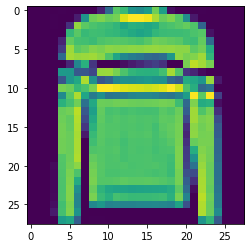

In [5]:
# Plotting the random images in data:
plt.imshow(train_data[5])

In [6]:
# Copying the Class names from the source dataset in the same index format, so it can be human readable:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Bag')

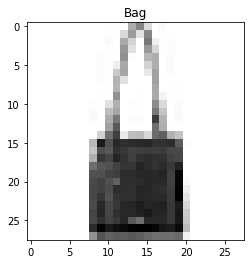

In [7]:
# Plotting a single image with readable class names:
plt.imshow(train_data[200], cmap=plt.cm.binary)
plt.title(class_names[train_labels[200]])

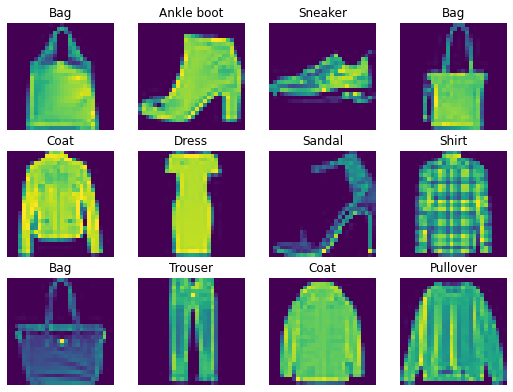

In [8]:
# Plotting multiple random images to check the classes:
plt.figure(figsize=(9,9))
for i in range(12):
    ax = plt.subplot(4,4,i+1)
    image_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[image_index])
    plt.title(class_names[train_labels[image_index]])
    plt.axis(False)

### Normalizing the data for Neural Network.

In [9]:
train_data.min(), train_data.max(), test_data.min(), test_data.max()

(0, 255, 0, 255)

In [10]:
scaled_train_data = train_data/255.0
scaled_test_data = test_data/255.0

In [11]:
scaled_train_data.min(), scaled_train_data.max()

(0.0, 1.0)

### Building the model with Shape (28,28) and length of classes = 10

In [40]:
tf.random.set_seed(50)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    
    tf.keras.layers.Dense(10, activation='softmax')
])

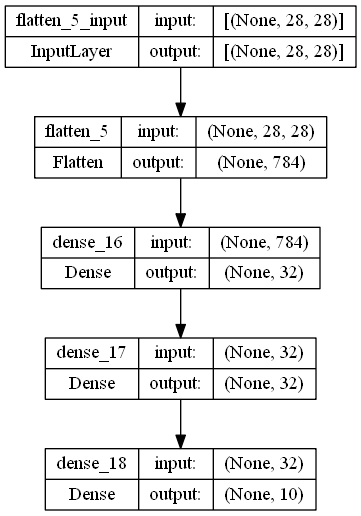

In [41]:
plot_model(model, show_shapes=True)

### Compiling the Model

In [44]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                       metrics=['accuracy'])

# Ideal Learning rate Callback:
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

### Fitting the Model

In [45]:
model_history = model.fit(scaled_train_data, train_labels, epochs=60, validation_data=(scaled_test_data, test_labels))

Epoch 1/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1477 - accuracy: 0.9443 - val_loss: 0.4590 - val_accuracy: 0.8828
Epoch 2/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1446 - accuracy: 0.9457 - val_loss: 0.4661 - val_accuracy: 0.8809
Epoch 3/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1437 - accuracy: 0.9472 - val_loss: 0.5054 - val_accuracy: 0.8770
Epoch 4/60
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1422 - accuracy: 0.9477 - val_loss: 0.4856 - val_accuracy: 0.8797
Epoch 5/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1402 - accuracy: 0.9477 - val_loss: 0.4984 - val_accuracy: 0.8798
Epoch 6/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1389 - accuracy: 0.9482 - val_loss: 0.5008 - val_accuracy: 0.8820
Epoch 7/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1381 - accuracy: 0.9483 - val_loss: 0.5015 - val_accuracy:

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1084 - accuracy: 0.9609 - val_loss: 0.7312 - val_accuracy: 0.8740
Epoch 58/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9620 - val_loss: 0.7306 - val_accuracy: 0.8691
Epoch 59/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1064 - accuracy: 0.9609 - val_loss: 0.7086 - val_accuracy: 0.8744
Epoch 60/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9620 - val_loss: 0.7094 - val_accuracy: 0.8727


In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 32)                25120     
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

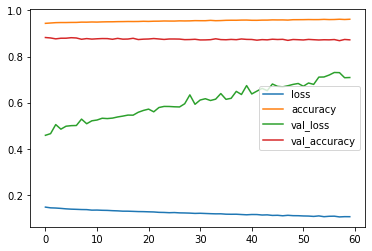

In [47]:
loss_curve = pd.DataFrame(model_history.history)
loss_curve.plot()

##### Accuracy is ~92%, checking Predictions:

In [48]:
y_probs = model.predict(scaled_test_data)
y_probs[:4]

313/313 [==============================] - 0s 1ms/step


array([[1.28789757e-27, 8.49127413e-35, 3.10133732e-27, 1.33040835e-19,
        5.10905909e-38, 7.48685985e-14, 8.60720654e-36, 1.83030693e-07,
        2.09811015e-19, 9.99999762e-01],
       [8.13402734e-10, 1.47525310e-19, 9.99900341e-01, 2.65639832e-13,
        9.79829420e-05, 3.76020072e-33, 1.63116795e-06, 4.95825133e-33,
        1.00508291e-21, 8.62195119e-23],
       [2.75336146e-20, 1.00000000e+00, 2.70333585e-25, 1.79378782e-19,
        2.59727602e-24, 0.00000000e+00, 4.44018577e-22, 0.00000000e+00,
        2.48236068e-23, 0.00000000e+00],
       [1.24598006e-20, 1.00000000e+00, 2.69467211e-21, 4.70065932e-15,
        8.77024384e-21, 0.00000000e+00, 1.16646490e-20, 0.00000000e+00,
        6.08352465e-22, 1.18599677e-34]], dtype=float32)

In [49]:
y_probs[0], class_names, tf.argmax([0]).numpy(), class_names[tf.argmax(y_probs[0])]

(array([1.2878976e-27, 8.4912741e-35, 3.1013373e-27, 1.3304083e-19,
        5.1090591e-38, 7.4868598e-14, 8.6072065e-36, 1.8303069e-07,
        2.0981101e-19, 9.9999976e-01], dtype=float32),
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 0,
 'Ankle boot')

In [50]:
# Convert Probabilities into Integers and check Random Predictions:
y_pred = y_probs.argmax(axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

## Model Evaluation using Confusion Metrics

In [51]:
confusion_matrix(test_labels, y_pred)

array([[810,   5,  16,  42,   7,   4, 109,   0,   7,   0],
       [  4, 970,   1,  19,   3,   0,   2,   0,   1,   0],
       [ 20,   3, 770,  13, 127,   0,  65,   0,   1,   1],
       [ 17,   8,  15, 904,  25,   0,  27,   0,   4,   0],
       [  0,   2,  72,  36, 843,   0,  43,   0,   4,   0],
       [  1,   0,   0,   2,   1, 942,   0,  23,   8,  23],
       [120,   2,  73,  42,  93,   0, 654,   0,  16,   0],
       [  0,   0,   0,   0,   0,  22,   0, 946,   5,  27],
       [  9,   0,   6,   6,   6,   6,  12,   4, 951,   0],
       [  0,   0,   0,   1,   0,  11,   1,  49,   1, 937]], dtype=int64)

In [52]:
# Create a Confusion Metrics:
# Source: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

from sklearn.metrics import confusion_matrix
import itertools
# figsize = (10,10)

def make_confusion_marix(y_true, y_pred, classes=None, figsize=(15,15), text_size = 10):

    cm = confusion_matrix(y_true, y_pred)

    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #Normalize our conf matr.
    n_classes = cm.shape[0]

    # Now lets pretify it:
    fig, ax = plt.subplots(figsize=figsize)

    # Create a Matrix Plot:
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Create Classes:
    # classes = False
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes:
    ax.set(title="Confusion Matrix", xlabel="Predicted Label", ylabel= "True Label",
          xticks=np.arange(n_classes), yticks=np.arange(n_classes), xticklabels=labels, yticklabels=labels)

    # Set X Axis labels to bottom:
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size:
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set Threshold for different colors:
    threshold = (cm.max() + cm.min())/2.

    # Plot the text on each cell:
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j] *100:.1f}%)", horizontalalignment = 'center',
                 color='white' if cm[i,j] > threshold else 'black', size=text_size)

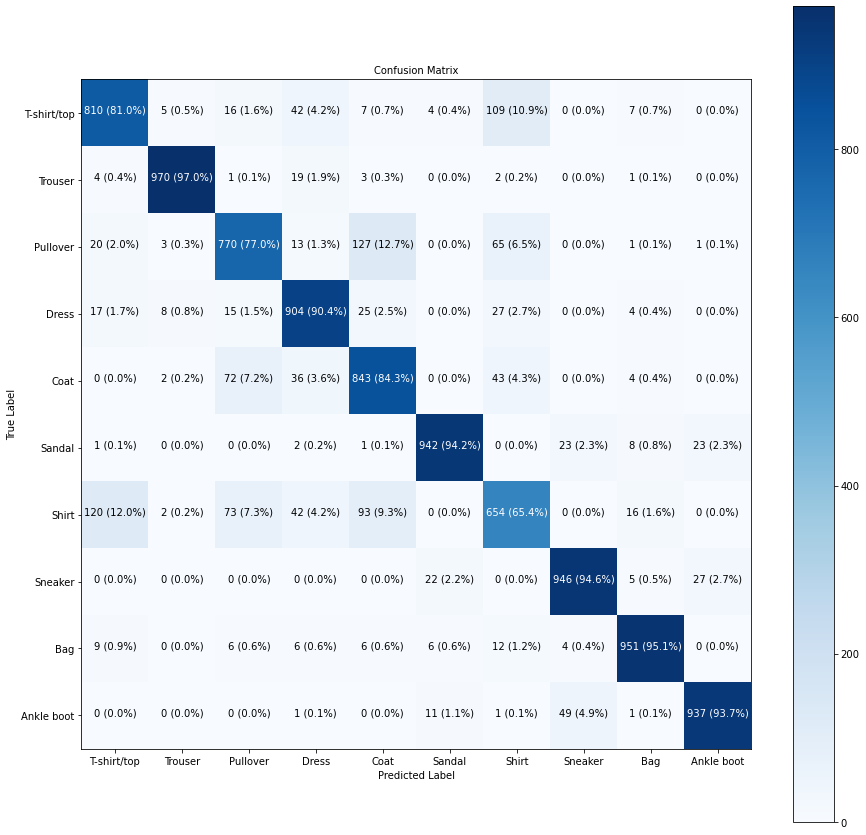

In [53]:
make_confusion_marix(y_true=test_labels, y_pred=y_pred, classes=class_names)

As the diagonal above shows, the accuracy is good except between Shirt, Coat and Pullover as they are very similar in shape.

#### Lets make predictions by plotting random images

In [60]:
def pred_any_image(model, images, true_labels, classes):
    
    i = random.randint(0, len(images))
    
    target_image = images[i]
    pred_prob = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_prob.argmax()]
    true_label = classes[true_labels[i]]
    
    plt.imshow(target_image)
    
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_prob), true_label), color = color)
    

### Correct Prediction would display in green and incorrect prediction would display in red color, with the percentage of the correctness/incorrectness, along with the label names.

1/1 [==============================] - 0s 18ms/step


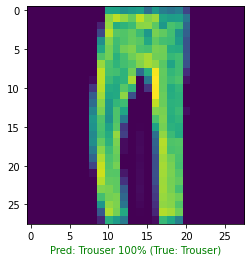

In [84]:
pred_any_image(model=model, images = scaled_test_data, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 36ms/step


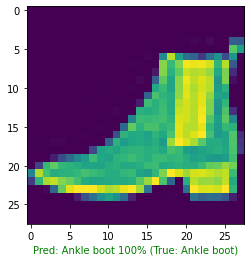

In [70]:
pred_any_image(model=model, images = scaled_test_data, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 22ms/step


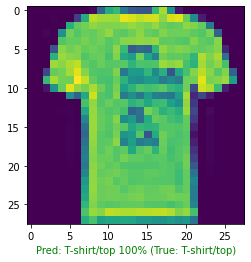

In [71]:
pred_any_image(model=model, images = scaled_test_data, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 21ms/step


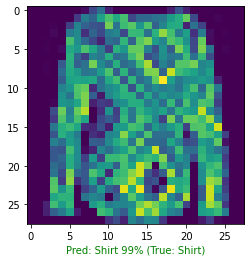

In [72]:
pred_any_image(model=model, images = scaled_test_data, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 22ms/step


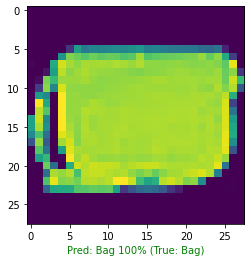

In [73]:
pred_any_image(model=model, images = scaled_test_data, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 25ms/step


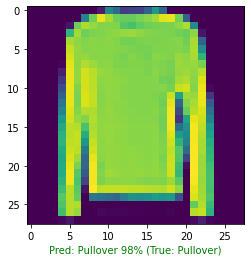

In [74]:
pred_any_image(model=model, images = scaled_test_data, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 22ms/step


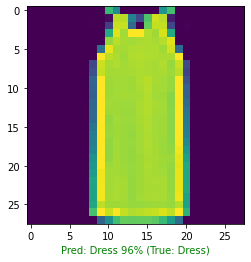

In [75]:
pred_any_image(model=model, images = scaled_test_data, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 24ms/step


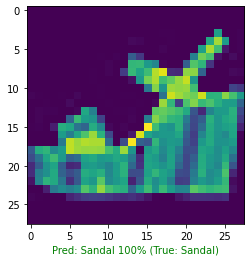

In [76]:
pred_any_image(model=model, images = scaled_test_data, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 26ms/step


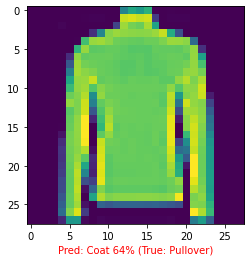

In [77]:
pred_any_image(model=model, images = scaled_test_data, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 26ms/step


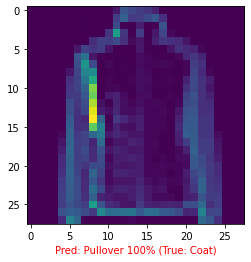

In [78]:
pred_any_image(model=model, images = scaled_test_data, true_labels=test_labels, classes=class_names)

1/1 [==============================] - 0s 26ms/step


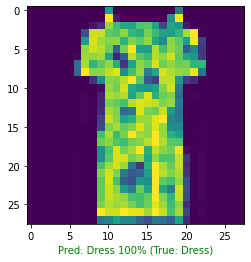

In [79]:
pred_any_image(model=model, images = scaled_test_data, true_labels=test_labels, classes=class_names)

# 2. Binary Class Classification Problem:

### Load the Dataset:
#### Source: https://github.com/scikit-learn/scikit-learn/blob/baf0ea25d/sklearn/datasets/_samples_generator.py#L641

In [167]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1200, random_state=50, noise=0.06)

In [168]:
X[:5], y

(array([[ 0.84881117, -0.1305016 ],
        [ 1.03480441,  0.09866527],
        [ 0.20430232, -0.96931304],
        [-0.75477735, -0.30226152],
        [ 0.15729369,  0.81463318]]),
 array([1, 0, 0, ..., 0, 0, 0], dtype=int64))

In [169]:
circles = pd.DataFrame({"Feature1": X[:,0], "Feature2": X[:,1], "Label": y})
circles.head(10)

,Feature1,Feature2,Label
0,0.848811,-0.130502,1
1,1.034804,0.098665,0
2,0.204302,-0.969313,0
3,-0.754777,-0.302262,1
4,0.157294,0.814633,1
5,0.723554,-0.031047,1
6,-0.540719,0.414121,1
7,0.301285,-1.045608,0
8,-0.949821,0.051965,0
9,-0.627019,0.849201,0


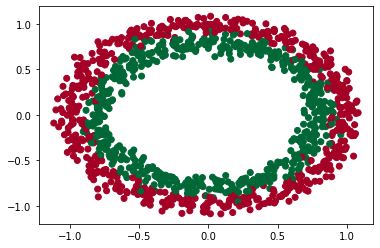

In [170]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlGn)

In [171]:
# Shapes:
X.shape, y.shape

((1200, 2), (1200,))

In [172]:
X[:,0]

array([0.84881117, 1.03480441, 0.20430232, ..., 0.77462771, 0.1661754 ,
       0.47702929])

In [176]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
len(X_train), len(y_test), len(X_test), len(y_train)

(960, 240, 240, 960)

In [209]:
# Model Building:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer = tf.keras.optimizers.Adam(), metrics='accuracy')

history2 = model2.fit(X_train, y_train, epochs=60)

Epoch 1/60
30/30 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5031
Epoch 2/60
30/30 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5021
Epoch 3/60
30/30 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5094
Epoch 4/60
30/30 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5292
Epoch 5/60
30/30 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5229
Epoch 6/60
30/30 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.5521
Epoch 7/60
30/30 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.7063
Epoch 8/60
30/30 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6625
Epoch 9/60
30/30 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7375
Epoch 10/60
30/30 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.7396
Epoch 11/60
30/30 [

In [190]:
model2.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.9417


[0.13951969146728516, 0.9416666626930237]

In [210]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 32)                25120     
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Loss Curves')

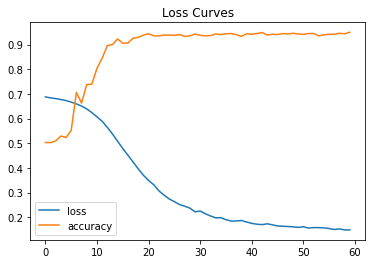

In [212]:
pd.DataFrame(history2.history).plot()
plt.title('Loss Curves')

In [226]:
import numpy as np
def plot_decision_boundary(model, X, y): 
    # Source: https://cs231n.github.io/neural-networks-case-study/
    
    # Define the axis boundaries of the plot and create a meshgrid
    X_min, X_max = X[:,0].min() -0.1, X[:,0].max()+0.1
    y_min, y_max = X[:,1].min() -0.1, X[:,1].max()+0.1
    XX, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Create X values to make Predictions On.
    x_in = np.c_[XX.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make Predictions:
    y_pred = model2.predict(x_in)
    
    # Check for multiclass:
    if len(y_pred[0]) > 1:
        print("Doing Multiclass Classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(XX.shape)
    else:
        print('Binary Classification')
        y_pred = np.round(y_pred).reshape(XX.shape)
        
    # Plot the Decision Boundary
    plt.contour(XX,yy,y_pred, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:,0], X[:,1], c = y, s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(XX.min(), XX.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Binary Classification


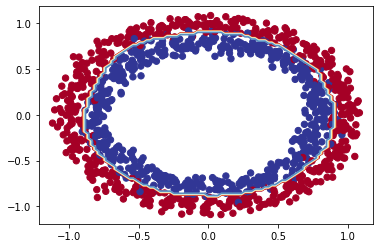

In [227]:
# Check the Predictions our model is making:
plot_decision_boundary(model = model2, X=X, y=y)

In [255]:
# Confusion Matrics:
y_pred = model2.predict(X_test)

confusion_matrix(y_test, tf.round(y_pred))

8/8 [==============================] - 0s 1ms/step


array([[114,   4],
       [  6, 116]], dtype=int64)

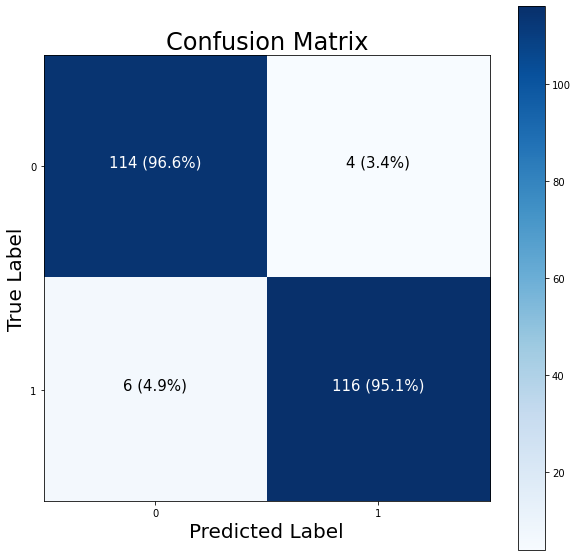

In [259]:
# Prettifying our confusion matrix:

import itertools
figsize = (10,10)

cm = confusion_matrix(y_test, tf.round(y_pred))

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #Normalize our conf matr.
n_classes = cm.shape[0]

# Now lets pretify it:
fig, ax = plt.subplots(figsize=figsize)

# Create a Matrix Plot:
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create Classes:
classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes:
ax.set(title="Confusion Matrix", xlabel="Predicted Label", ylabel= "True Label",
      xticks=np.arange(n_classes), yticks=np.arange(n_classes), xticklabels=labels, yticklabels=labels)

# Set X Axis labels to bottom:
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size:
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(24)

# Set Threshold for different colors:
threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell:
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j] *100:.1f}%)", horizontalalignment = 'center',
             color='white' if cm[i,j] > threshold else 'black', size=15)

In [256]:
# Make Predictions:
y_pred = model2.predict(X_test)
y_pred

8/8 [==============================] - 0s 1ms/step


array([[5.20280898e-02],
       [9.16247256e-03],
       [4.04869653e-02],
       [8.15702416e-03],
       [9.06284433e-03],
       [9.38937902e-01],
       [8.51228774e-01],
       [2.32584383e-02],
       [9.93921697e-01],
       [9.89066720e-01],
       [9.88546550e-01],
       [9.92609143e-01],
       [2.43628188e-03],
       [5.65086424e-01],
       [1.04313791e-01],
       [9.52122986e-01],
       [4.50227596e-02],
       [4.39546794e-01],
       [2.54052103e-01],
       [2.08113678e-02],
       [9.93378878e-01],
       [2.05897563e-03],
       [4.21209522e-02],
       [5.96335204e-03],
       [1.31360367e-01],
       [4.23737383e-03],
       [9.93411481e-01],
       [1.51062131e-01],
       [2.30030894e-01],
       [2.23746663e-03],
       [9.98143137e-01],
       [4.17218238e-01],
       [9.82329369e-01],
       [5.48323452e-01],
       [3.70341390e-02],
       [9.83838260e-01],
       [9.78524745e-01],
       [9.69831109e-01],
       [9.96878564e-01],
       [9.98087704e-01],


313/313 [==============================] - 0s 1ms/step
Binary Classification
313/313 [==============================] - 0s 1ms/step
Binary Classification


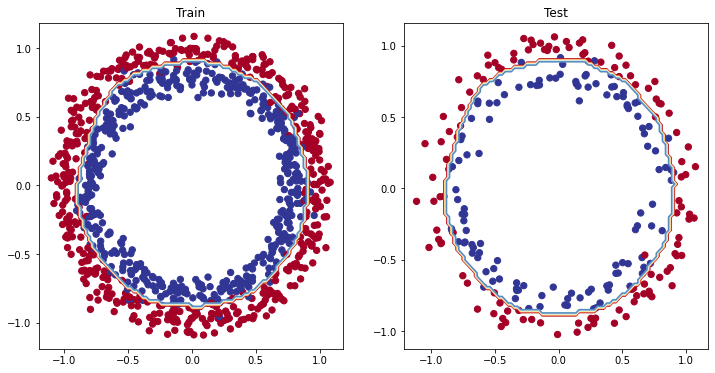

In [249]:
# Plot the decision boundaries for the training and test data:
# Model2
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model2, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model2, X_test, y_test )
plt.show()